In [2]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib. pyplot as plt
import numpy as np
import random
import math
%matplotlib inline

In [2]:
def dis(x,y,z):
    return pow(pow(x,2)+pow(y,2)+pow(z,2),0.5) #teorema de pitagoras

In [ ]:
def dis_NN(m):
    dis_2d = []
    N = len(m[:,0])
    for i in range(N):
        for j in range(N):
            if i != j: # No consideramos distancias entre un mismo punto.
                if i > j: #No consideramos las mismas distancias repetidas entre puntos repetidos.
                    dis_2d.append(dis( m[:,0][i]-m[:,0][j], m[:,1][i]-m[:,1][j], 0 ))
    return dis_2d

In [ ]:
def Histo_dist (Dist,bins_0):
    dis_2d = []

    
    N = len(m[:,0])
    for i in range(N):
        for j in range(N):
            if i != j: # No consideramos distancias entre un mismo punto.
                if i > j: #No consideramos las mismas distancias repetidas entre puntos repetidos.
                    dis_2d.append(dis( m[:,0][i]-m[:,0][j], m[:,1][i]-m[:,1][j], 0 ))
    frec, b = np.histogram(Dist, bins = bins_0)
    plt.figure()
    histo_2d = np.array(Dist) 
    plt.figure()
    plt.hist(histo_2d, bins=bins_0)
    plt.title("Histograma de distancias",fontsize=18)
    plt.ylabel("Frecuencia",fontsize=18) 
    plt.xlabel("Distancia",fontsize=18)
    plt.show()
    return frec, b

In [3]:
def malla_cuad (tamaño,ret): 
    DD = [] 
    DD = open('Tabla_Datos_malla.dat',"w")  #abrimos un scrip para manejar los datos.
    c, d = 0, 0
    for i in range(int(tamaño/ret)): 
        for j in range(int(tamaño/ret)):
            c, d  = i*ret, j*ret #acomoda los puntos en y
            DD.write("%f  \t%f \n" % (c,d))
    DD.close()
    return np.loadtxt('Tabla_Datos_malla.dat') 

In [41]:
def caja_Rand(dim,puntos): 
    R = open('Tabla_Aleatorios.dat',"w") #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        a, b = 0, 0 #iniciamos las variables
        a = random.random()*dim #random.random sólo da valores entre 0 y 1 por lo que lo multiplico por la dimención de la caja
        b = random.random()*dim
        R.write("%f  \t%f \n" % (a,b)) #escribimos los valores en el scip.
    R.close()
    return np.loadtxt('Tabla_Aleatorios.dat') # x = RR[:,0] | y = RR[:,1]

In [53]:
dimencion = 1000
puntos = 1000
Dt_al = caja_Rand(dimencion,puntos) #hacemos la caja
malla = malla_cuad(1000,25)

In [10]:
import numpy, scipy.spatial.distance as dist

In [64]:
Dt_al[:,0]

array([7.69199492e+02, 7.46196750e+02, 8.43568720e+02, 9.45598860e+02,
       4.48212610e+01, 9.04809112e+02, 9.95291220e+01, 4.34281793e+02,
       9.09989900e+01, 6.41502450e+02, 7.85453909e+02, 1.37357352e+02,
       9.48373700e+02, 3.53596150e+01, 6.85201054e+02, 7.31703724e+02,
       7.90049125e+02, 4.82103893e+02, 7.48486820e+01, 5.15848070e+02,
       5.20745023e+02, 7.22211789e+02, 4.63807920e+02, 1.79100023e+02,
       7.53521903e+02, 4.55604391e+02, 9.09754769e+02, 7.07496155e+02,
       8.16653149e+02, 5.10447813e+02, 3.89787791e+02, 3.70282541e+02,
       9.23189300e+01, 6.13598726e+02, 6.25982414e+02, 7.84568560e+01,
       5.60708557e+02, 3.55990248e+02, 3.67421607e+02, 2.29064004e+02,
       7.94931810e+02, 7.50908864e+02, 5.17080582e+02, 1.51384680e+01,
       3.51438456e+02, 9.69155392e+02, 3.55066746e+02, 3.33450599e+02,
       2.03969473e+02, 6.39950939e+02, 1.51171248e+02, 3.99259400e+01,
       7.13825807e+02, 1.85547842e+02, 7.79172676e+02, 3.41401324e+02,
      

In [72]:
malla[:,1]

array([  0.,  25.,  50., ..., 925., 950., 975.])

In [20]:
Dis = dist.squareform(dist.pdist(malla, "euclidean"))

In [47]:
Dt_al = Dt_al.reshape(-1)
malla = malla.reshape(-1)


In [65]:
a = []
b = []
for i in range(len(malla)):
    a.append(Dt_al[:,0]-malla[:,0][i])
    b.append(Dt_al[:,1]-malla[:,1][i])
dis_DR = np.sqrt(np.power(a,2)+np.power(b,2)) 

In [68]:
dis_DR = dis_DR.reshape(-1)

<Figure size 432x288 with 0 Axes>

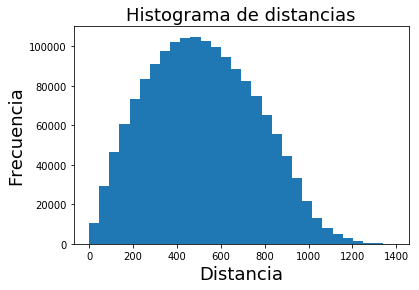

In [69]:
plt.figure()
histo_2d = np.array(dis_DR) 
plt.figure()
plt.hist(histo_2d, bins=30)
plt.title("Histograma de distancias",fontsize=18)
plt.ylabel("Frecuencia",fontsize=18) 
plt.xlabel("Distancia",fontsize=18)
plt.show()